In [1]:
# library import
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [14]:
df = pd.read_csv("./MuhammadOwais_Imran_HeartAttack.csv")
print(df.shape)
df.head()

(300, 5)


,RestHR,MaxHR,RecHR,BP,Heart_attack
0,100,133,89,106,Light
1,105,143,89,116,Light
2,96,134,89,109,Light
3,101,144,89,119,Light
4,96,136,85,106,Light


In [15]:
# separating target and data
target = df['Heart_attack']
df.drop(columns=['Heart_attack'], inplace=True)
df.head()

,RestHR,MaxHR,RecHR,BP
0,100,133,89,106
1,105,143,89,116
2,96,134,89,109
3,101,144,89,119
4,96,136,85,106


In [16]:
# dividing data into 30% test and 70% train
X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.3, random_state=42, shuffle=True)

In [17]:
# Initializing and Predicting Results using Random Forest Classifier

tree = RandomForestClassifier(n_estimators=100,random_state=8)
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
print(f"Model Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(Y_test, Y_pred)}\n")
print(f"Classification Report:\n {classification_report(Y_test, Y_pred)}\n")

Model Accuracy: 0.9444444444444444
Confusion Matrix:
 [[34  0  1]
 [ 0 27  0]
 [ 0  4 24]]

Classification Report:
               precision    recall  f1-score   support

       Light       1.00      0.97      0.99        35
     Massive       0.87      1.00      0.93        27
        Mild       0.96      0.86      0.91        28

    accuracy                           0.94        90
   macro avg       0.94      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90




Mean Decrease Accuracy[0.09024115 0.02863271 0.47511934 0.4060068 ]

Mean Decrease GINI= [0.05986201 0.01899368 0.31517327 0.26932705]


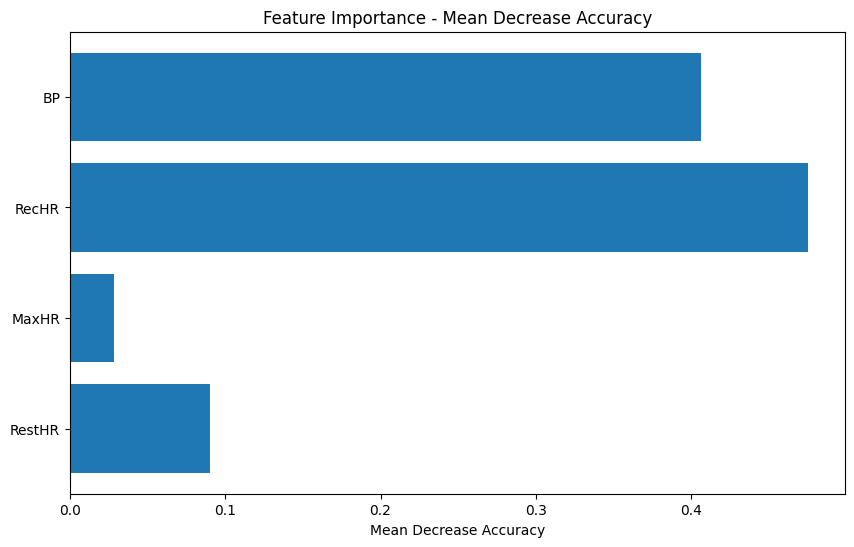

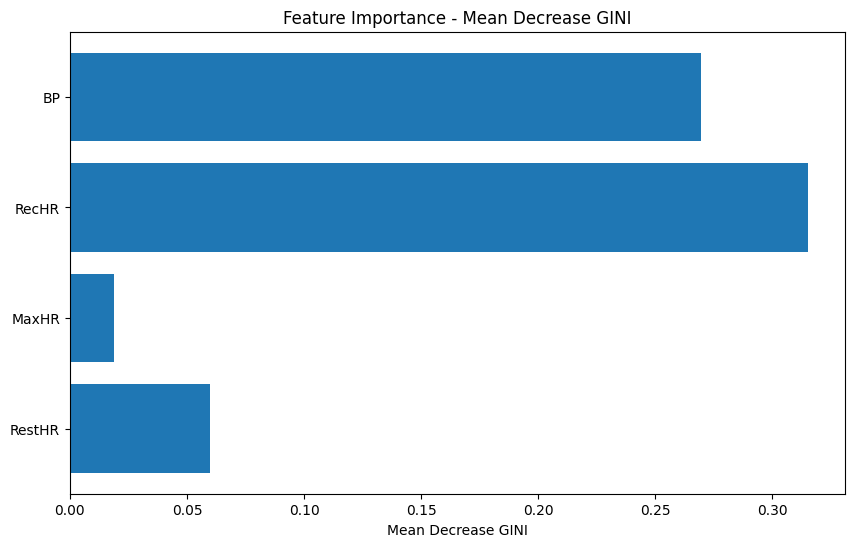

In [18]:

# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = tree.feature_importances_
print(f"Mean Decrease Accuracy{ mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = tree.feature_importances_ * tree.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), df.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), df.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()
 

<br></br>
<b>Which Features are the Most Important?</b>
<br> The most important feature is RecHR, as it can also be inferred that the greater the heart recovery rate, greater was the impact of heart attack was i.e. for Massive Heart Attacks values of RecHR ranges in between 120-148, a little lesser for Mild, and even less for Light Heart Attack
